In [2]:
# xarray to read NETCDF
import numpy as np
import pandas as pd
import xarray as xr

In [5]:
# Load the dataset (NMME)
ds = xr.open_dataset('data/NMME/CanESM5/prec.CanESM5.1991.mon_Apr.nc')

# View dataset info
print(ds)

<xarray.Dataset> Size: 63MB
Dimensions:  (Y: 181, L: 12, X: 360, M: 20, S: 1)
Coordinates:
  * Y        (Y) float32 724B -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * L        (L) float32 48B 0.5 1.5 2.5 3.5 4.5 5.5 6.5 7.5 8.5 9.5 10.5 11.5
  * X        (X) float32 1kB 0.0 1.0 2.0 3.0 4.0 ... 356.0 357.0 358.0 359.0
  * M        (M) float32 80B 1.0 2.0 3.0 4.0 5.0 ... 16.0 17.0 18.0 19.0 20.0
  * S        (S) datetime64[ns] 8B 1991-04-01
Data variables:
    prec     (S, L, M, Y, X) float32 63MB ...


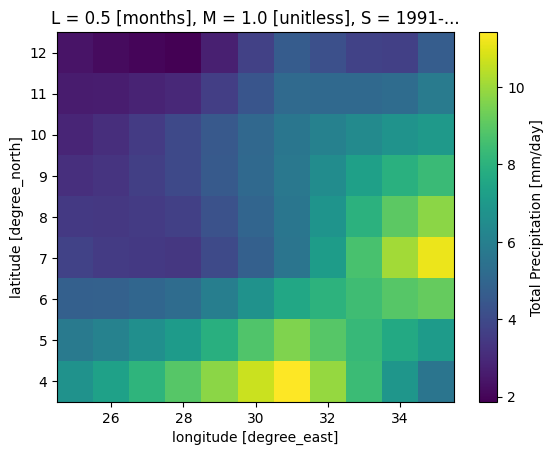

In [51]:
CanESM5_south_sudan_test = ds.sel(Y=slice(3.5, 12.5), X=slice(25, 35), L=0.5, M=1)
CanESM5_south_sudan_test['prec'].plot()

In [7]:
CanESM5 = xr.open_mfdataset('data/NMME/CanESM5/*.nc')
CanESM5_south_sudan = CanESM5.sel(Y=slice(3.5, 12.5), X=slice(25, 35))
CanESM5_south_sudan_df = CanESM5_south_sudan.to_dataframe().reset_index().drop('M', axis = 1).rename(columns = {'S': 'date', 'L': 'lead time', 'Y': 'latitude', 'X': 'longitude', 'prec': 'precip'})

In [8]:
CanESM5_south_sudan_df.head()

,date,lead time,latitude,longitude,precip
0,1991-01-01,0.5,4.0,25.0,2.090236
1,1991-01-01,0.5,4.0,26.0,1.841922
2,1991-01-01,0.5,4.0,27.0,1.378603
3,1991-01-01,0.5,4.0,28.0,0.914030
4,1991-01-01,0.5,4.0,29.0,0.795878


In [23]:
CanESM5_south_sudan_df_clean = CanESM5_south_sudan_df
CanESM5_south_sudan_df_clean['month'] = CanESM5_south_sudan_df_clean['date'].dt.month
CanESM5_south_sudan_df_clean['date predicted'] = CanESM5_south_sudan_df_clean['date'] + pd.DateOffset(months=CanESM5_south_sudan_df_clean['lead time'].round())
CanESM5_south_sudan_df_clean

TypeError: cannot convert the series to <class 'int'>

In [24]:
CanESM5_south_sudan_df_clean['lead time'].round()

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
           ... 
8648635    12.0
8648636    12.0
8648637    12.0
8648638    12.0
8648639    12.0
Name: lead time, Length: 8648640, dtype: float32

In [ ]:
CanESM5_south_sudan_df_clean['month predicted'] = CanESM5_south_sudan_df_clean['month'] + CanESM5_south_sudan_df_clean['lead time'].round()

In [12]:
chirps = xr.open_dataset('data/CHIRPS/chirps-v2.0.monthly.nc')
min_lat = 3.5
max_lat = 12.5
min_lon = 25
max_lon = 35

print(chirps)

<xarray.Dataset> Size: 30GB
Dimensions:    (latitude: 2000, longitude: 7200, time: 528)
Coordinates:
  * latitude   (latitude) float32 8kB -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 29kB -180.0 -179.9 -179.9 ... 179.9 180.0
  * time       (time) datetime64[ns] 4kB 1981-01-01 1981-02-01 ... 2024-12-01
Data variables:
    precip     (time, latitude, longitude) float32 30GB ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2025-01-15
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/ch

In [24]:
chirps.data_vars

Data variables:
    precip   (time, latitude, longitude) float32 30GB ...

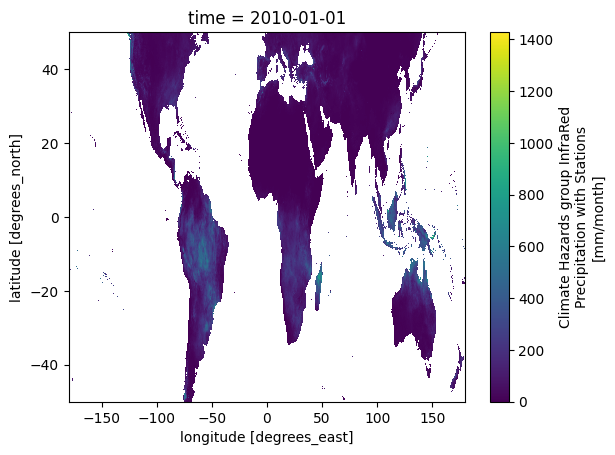

In [43]:
chirps.sel(time='2010-01')['precip'].plot()

In [13]:
#South Sudan
chirps_south_sudan = chirps.sel(latitude=slice(3.5, 12.5), longitude=slice(25, 35))
chirps_south_sudan_df = chirps_south_sudan.to_dataframe().reset_index()

In [14]:
chirps_south_sudan_df

,latitude,longitude,time,precip
0,3.524998,25.024994,1981-01-01,41.080067
1,3.524998,25.024994,1981-02-01,63.573013
2,3.524998,25.024994,1981-03-01,180.132874
3,3.524998,25.024994,1981-04-01,160.312561
4,3.524998,25.024994,1981-05-01,150.193695
...,...,...,...,...
19007995,12.474998,34.974991,2024-08-01,133.298737
19007996,12.474998,34.974991,2024-09-01,120.944992
19007997,12.474998,34.974991,2024-10-01,41.311260
19007998,12.474998,34.974991,2024-11-01,0.847798


In [33]:
chirps_south_sudan_df[['latitude', 'longitude']].apply(np.floor)

,latitude,longitude
0,3.0,25.0
1,3.0,25.0
2,3.0,25.0
3,3.0,25.0
4,3.0,25.0
...,...,...
19007995,12.0,34.0
19007996,12.0,34.0
19007997,12.0,34.0
19007998,12.0,34.0


In [29]:
chirps_south_sudan_df['latitude'].unique()

array([ 3.5249977,  3.574997 ,  3.625    ,  3.6749992,  3.7249985,
        3.7749977,  3.824997 ,  3.875    ,  3.9249992,  3.9749985,
        4.0249977,  4.074997 ,  4.125    ,  4.174999 ,  4.2249985,
        4.2749977,  4.324997 ,  4.375    ,  4.424999 ,  4.4749985,
        4.5249977,  4.574997 ,  4.625    ,  4.674999 ,  4.7249985,
        4.7749977,  4.824997 ,  4.875    ,  4.924999 ,  4.9749985,
        5.0249977,  5.074997 ,  5.125    ,  5.174999 ,  5.2249985,
        5.2749977,  5.324997 ,  5.375    ,  5.424999 ,  5.4749985,
        5.5249977,  5.574997 ,  5.625    ,  5.674999 ,  5.7249985,
        5.7749977,  5.824997 ,  5.875    ,  5.924999 ,  5.9749985,
        6.0249977,  6.074997 ,  6.125    ,  6.174999 ,  6.2249985,
        6.2749977,  6.324997 ,  6.375    ,  6.424999 ,  6.4749985,
        6.5249977,  6.574997 ,  6.625    ,  6.674999 ,  6.7249985,
        6.7749977,  6.824997 ,  6.875    ,  6.924999 ,  6.9749985,
        7.0249977,  7.074997 ,  7.125    ,  7.174999 ,  7.2249

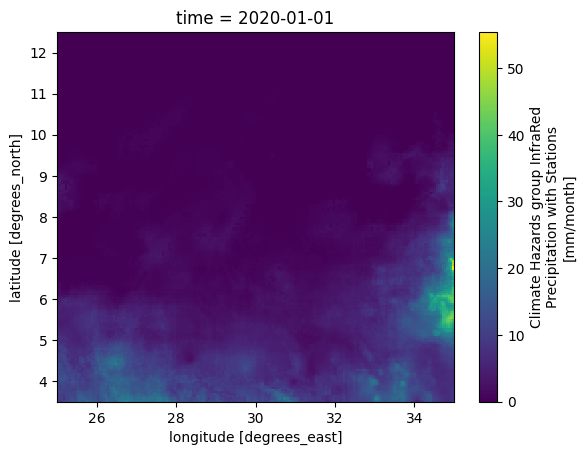

In [27]:
test_plot_ds = chirps_south_sudan.sel(time='2020-01')
test_plot_ds['precip'].plot()